In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
from sklearn.datasets import load_digits
X,y = load_digits().data,load_digits().target
X.shape

(1797, 64)

In [8]:
rearrangement = sorted(np.arange(len(X)),key=lambda i:y[i])
X_ = X[rearrangement]
y_ = y[rearrangement]

In [10]:
from scipy.cluster import hierarchy
from scipy.spatial import distance
c = hierarchy.linkage(X_,'single')
d = distance.squareform(hierarchy.cophenet(c))

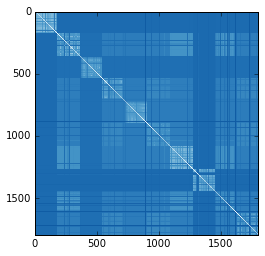

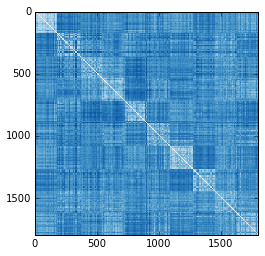

In [16]:
plt.imshow(d,cmap="Blues");
plt.figure()
plt.imshow(distance.squareform(distance.pdist(X_)),cmap="Blues")

In [17]:
def generate_triplet_from_distance_matrix(d):
    i,j,k = npr.randint(0,len(d),3)
    if d[i,j] > d[i,k]:
        j,k = k,j
    return i,j,k

In [21]:
i,j,k = generate_triplet_from_distance_matrix(d)
print(i,j,k)

(617, 1056, 299)


In [22]:
d[i,j],d[i,k]

(21.400934559032695, 22.405356502408079)

In [39]:
npr.seed(0)
triplets = [generate_triplet_from_distance_matrix(d)
            for _ in range(10000)]

In [40]:
i,j,k = triplets[0]
d[i,j],d[i,k]

(16.852299546352718, 22.449944320643649)

In [41]:
def zero_one_triplet_loss(distance_close,distance_far):
    return 1.0*(distance_far < distance_close)

In [107]:
from sklearn.decomposition import PCA
pca = PCA(2)
X_pca = pca.fit_transform(X_)

euclidean_distance = distance.squareform(distance.pdist(X_pca))

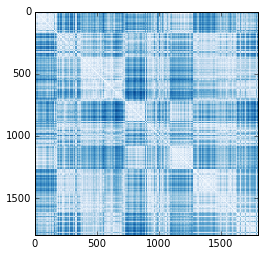

In [108]:
plt.imshow(euclidean_distance,cmap="Blues");

In [84]:
def dataset_loss(triplets,distmat,loss_func=zero_one_triplet_loss):
    l = 0
    for (i,j,k) in triplets:
        l += loss_func(distmat[i,j],distmat[i,k])
    return l

In [85]:
dataset_loss(triplets,euclidean_distance) / len(triplets)

0.44890000000000002

In [86]:
from time import time
t = time()
print(dataset_loss(triplets,euclidean_distance) / len(triplets))
print(time() - t)

0.4489
0.0285229682922


In [87]:
def generate_psd_matrix(in_dim=64,out_dim=64):
    A = npr.randn(in_dim,out_dim)
    W = np.diag(np.abs(npr.randn(in_dim)))
    
    
    return np.dot(np.dot(A,W),A.T)

generate_psd_matrix().shape#,np.dot(X_,generate_psd_matrix()).shape

(64, 64)

In [88]:
def zero_one_loss(matrix):
    X_transformed = np.dot(X_,matrix)
    euclidean_distance = distance.squareform(distance.pdist(X_transformed))
    return dataset_loss(triplets,euclidean_distance) / len(triplets)

In [89]:
t = time()
print(zero_one_loss(generate_psd_matrix()))
print(time() - t)

0.4143
0.174557209015


In [90]:
npr.seed(0)
matrices = [generate_psd_matrix() for _ in range(100)]
losses = [zero_one_loss(matrix) for matrix in matrices]
print(min(losses))

0.3978


In [92]:
npr.seed(0)
matrices = [npr.randn(64,2) for _ in range(100)]
losses = [zero_one_loss(matrix) for matrix in matrices]
print(np.argmin(losses),min(losses))

(61, 0.42799999999999999)


In [95]:
print(np.argmax(losses),max(losses))

starting_mat = matrices[np.argmin(losses)]

(50, 0.51500000000000001)


In [96]:
npr.seed(0)
refined_matrices = [starting_mat + 0.1*npr.randn(64,2) for _ in range(100)]
refined_losses = [zero_one_loss(matrix) for matrix in refined_matrices]
print(np.argmin(refined_losses),min(refined_losses))

(64, 0.41959999999999997)


In [97]:
starting_mat = refined_matrices[np.argmin(refined_losses)]

In [98]:
npr.seed(0)
refined_matrices = [starting_mat + 0.1*npr.randn(64,2) for _ in range(100)]
refined_losses = [zero_one_loss(matrix) for matrix in refined_matrices]
print(np.argmin(refined_losses),min(refined_losses))

(10, 0.41170000000000001)


In [103]:
X_random_proj = np.dot(X_,refined_matrices[10])
X_random_proj.shape

(1797, 2)

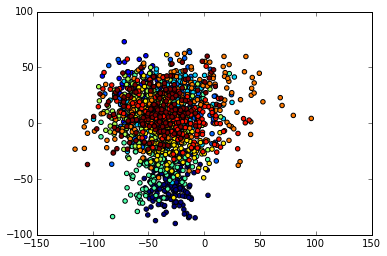

In [105]:
plt.scatter(X_random_proj[:,0],X_random_proj[:,1],c=y_)

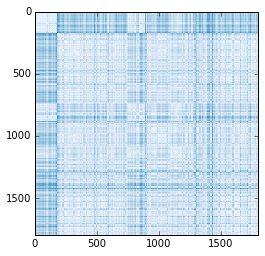

In [110]:
plt.imshow(distance.squareform(distance.pdist(X_random_proj)),cmap='Blues')